In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

#Load and preprocess the MNIST dataset

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data() 
train_images, test_images = train_images/255.0, test_images/255.0

In [11]:
#Add channel dimension to the images

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) 
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#Split the dataset into training and validation sets

train_images, val_images, train_labels, val_labels =  train_test_split( train_images, train_labels, test_size=0.1, random_state=42)

#Data augmentation for training images

datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range = 0.1,
                            height_shift_range=0.1) 
datagen.fit(train_images)

#Create a CNN model with hyperparameter tuning and regularization
model = models. Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model

model.compile(optimizer = Adam(learning_rate = 0.001),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model with data augmentation 
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), 
                    epochs = 20, validation_data = (val_images, val_labels))

Epoch 1/20
  4/760 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.1087 - loss: 2.3069

c:\Users\Suchita\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


760/760 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7281 - loss: 0.8011 - val_accuracy: 0.9772 - val_loss: 0.0678
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9527 - loss: 0.1503 - val_accuracy: 0.9835 - val_loss: 0.0508
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9662 - loss: 0.1093 - val_accuracy: 0.9874 - val_loss: 0.0452
Epoch 4/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9725 - loss: 0.0872 - val_accuracy: 0.9885 - val_loss: 0.0362
Epoch 5/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9766 - loss: 0.0743 - val_accuracy: 0.9889 - val_loss: 0.0379
Epoch 6/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9806 - loss: 0.0656 - val_accuracy: 0.9920 - val_loss: 0.0312
Epoch 7/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9815 - loss: 0.0617 - val_accuracy: 0.9902 - val_loss: 0.0364
Epoch 8/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9826 - loss: 0.0566 - val_accurac

In [12]:
#Evaluate the model on the test set

test_loss, test_acc =  model.evaluate(test_images, test_labels) 
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0233
Test Accuracy: 0.9940000176429749


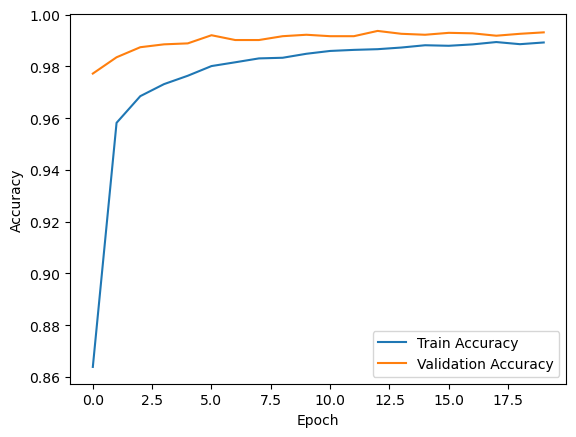

In [14]:
#Plot training history

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()